# Lending Club Case Study


#### Problem Statement

The consumer finance company which specialises in lending various types of loans to urban customers.

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

The main objective to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

Perform an analysis to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company want to utilise this knowledge for its portfolio and risk assessment.  

We will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
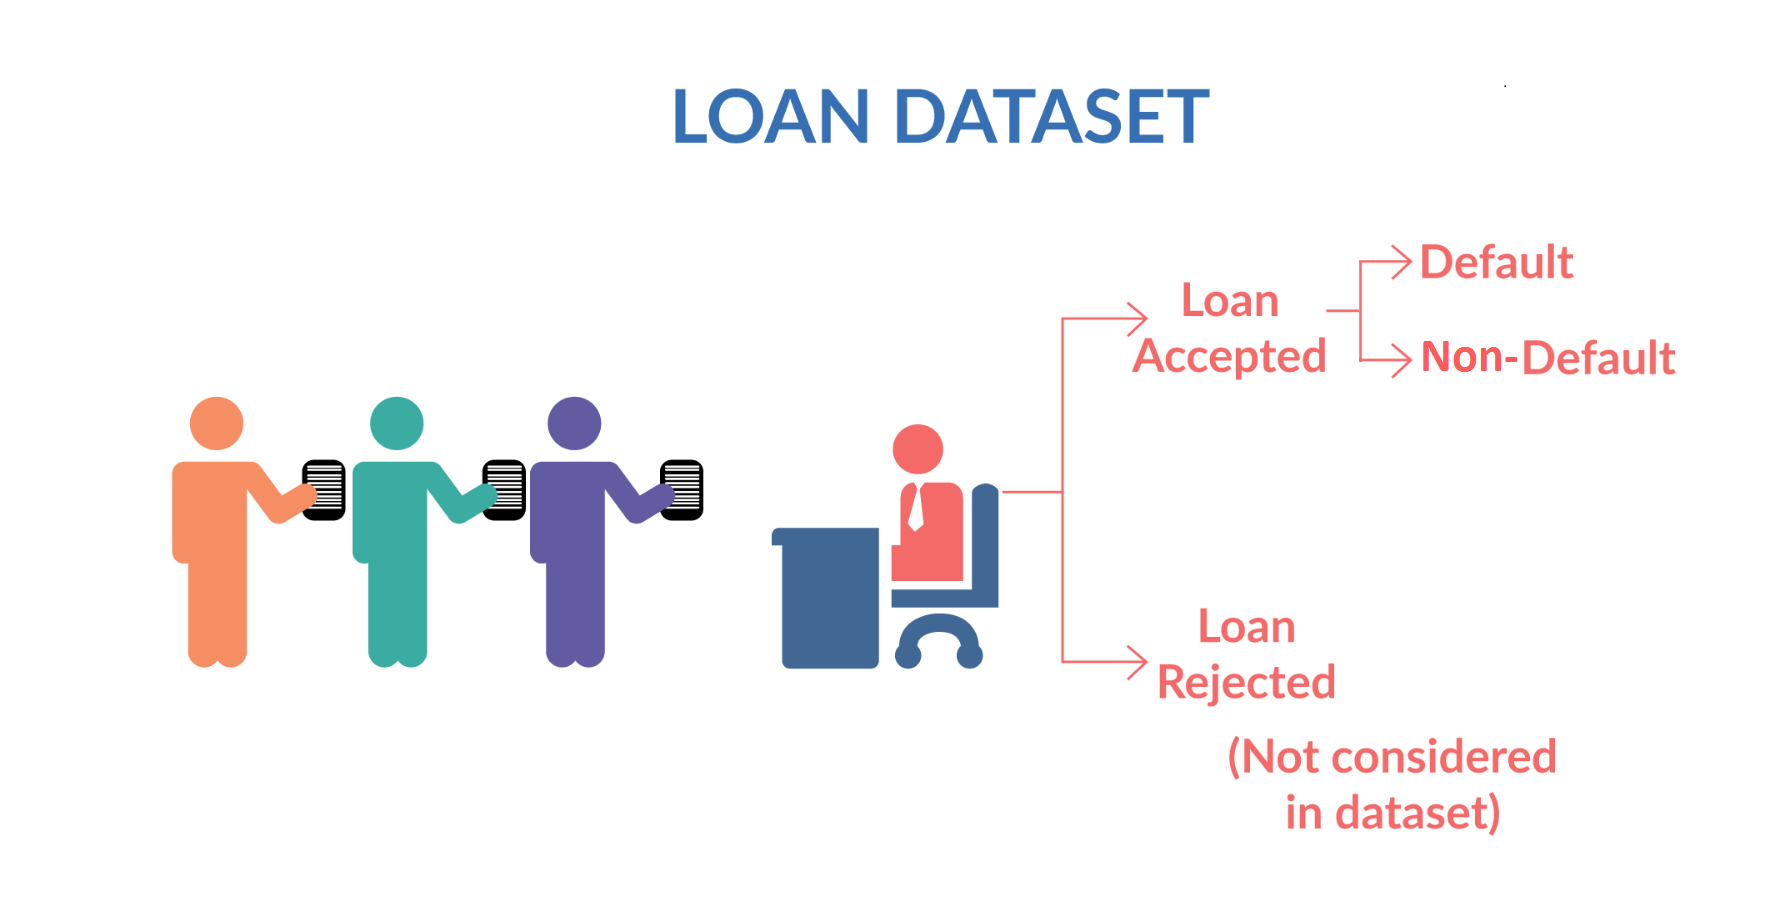


## Import Necessary Libraries

In [137]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization  
import seaborn as sn
import matplotlib.pyplot as plt

# Extra - To Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [156]:
#Read CSV file and check it's attributes.
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [157]:
#Check the shape of the loan data
loan.shape

(39717, 111)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [158]:
#Check the datatypes of all the columns of the the loan data

print(loan.info())

print(loan.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### Check for duplicate rows in dateset

In [159]:
dup = loan[loan.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### Missing Value Treatment

In [160]:
#Check how many rows have missing values
print('Number of empty Rows:')
loan.isnull().all(axis=1).sum()

Number of empty Rows:


0

In [161]:
#Check how many columns have missing values
print('Number of empty Columns:')
loan.isnull().all(axis=0).sum()

Number of empty Columns:


54

In [162]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Handling missing values
 - drop columns where all values are null.

In [163]:
# Removeing columns with all null values
loan = loan.dropna(axis=1, how='all')
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [164]:
#Check the percentage of null values in the columns after dropping null values
100*loan.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [165]:
# Drop additional columns those have more than 30% null values
# Removing these columns will reduce impact on analysis and it will improve the accuracy of the analysis.
columns_drop_list = ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
loan.drop(labels = columns_drop_list, axis=1, inplace=True)

In [166]:
100*loan.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

### Analysis of colunms for single valued

In this data set some columns have single value and these columns will not contribute in EDA process. So, we would need to remove those columns from the data set.


In [167]:
# Get all single valued columns into an array.

single_valued_coulmns = []
for column in loan.columns:
    if (loan[column][0] == loan[column]).all():
        single_valued_coulmns.append(column)
print(single_valued_coulmns)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']


Removing above columns because these columns are single valued columns.

In [168]:
# Removing above columns because these columns are single valued columns.

loan.drop(single_valued_coulmns, axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0


In [169]:
#Checking for missing values across the rows
print((loan.isnull().sum(axis=1)).max())

5


The max number of missing values in rows are very low as compared to the number of remaining columns(47 columns after removing null irrelevant "valued and single values, etc." columns). So, we can ignore these values.

In [170]:
#Check remaining columns of the loan dataset.
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Removing the Irrelevent coumns

- To approve loan, we would need analyse the user details and the driving factors of the loan defaulting
- We can remove these columns as these are not needed in loan analysis: "id", "member_id", "emp_title", "url","title", "zip_code", "addr_state".
- Removing "funded_amnt_inv" column because it is for internal uses.

#### List of Post-Approval dimentions

- 'delinq_2yrs'
- 'earliest_cr_line'
- 'inq_last_6mths'
- 'open_acc', 'pub_rec'
- 'revol_bal'
- 'revol_util'
- 'total_acc'
- 'out_prncp'
- 'out_prncp_inv'
- 'total_pymnt'
- 'total_pymnt_inv'
- 'total_rec_prncp'
- 'total_rec_int'
- 'total_rec_late_fee'
- 'recoveries'
- 'collection_recovery_fee'
- 'last_pymnt_d'
- 'last_pymnt_amnt'
- 'last_credit_pull_d'
- 'collections_12_mths_ex_med'
- 'chargeoff_within_12_mths'
- 'tax_liens'

In [171]:
# Removing columns those are calculated after loan. So, these columns are irrelevant for analysis.
columns_after_loan_cal = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                          'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                          'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                          'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'funded_amnt_inv',
                         'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan.drop(columns_after_loan_cal, axis = 1, inplace = True)
coulmns_user_personal = ["id", "member_id", "emp_title", "url","title", "zip_code", "addr_state"]
loan.drop(coulmns_user_personal, axis = 1, inplace = True)
loan.head()

[   loan_amnt  funded_amnt        term int_rate  installment grade sub_grade  \
 0       5000         5000   36 months   10.65%       162.87     B        B2   
 1       2500         2500   60 months   15.27%        59.83     C        C4   
 2       2400         2400   36 months   15.96%        84.33     C        C5   
 3      10000        10000   36 months   13.49%       339.31     C        C1   
 4       3000         3000   60 months   12.69%        67.79     B        B5   
 
   emp_length home_ownership  annual_inc verification_status issue_d  \
 0  10+ years           RENT     24000.0            Verified  Dec-11   
 1   < 1 year           RENT     30000.0     Source Verified  Dec-11   
 2  10+ years           RENT     12252.0        Not Verified  Dec-11   
 3  10+ years           RENT     49200.0     Source Verified  Dec-11   
 4     1 year           RENT     80000.0     Source Verified  Dec-11   
 
    loan_status         purpose    dti  pub_rec_bankruptcies  
 0   Fully Paid     c

In [172]:
loan.shape

(39717, 16)

In [173]:
#Check remaining columns of the loan dataset.
loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

### Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [174]:
#Check the percentage of null values in the columns
100*loan.isnull().mean()

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### Handling Missing values

- Columns with missing values are "emp_length" and "pub_rec_bankruptcies"


In [179]:
loan[['emp_length','pub_rec_bankruptcies']].isnull().sum()

emp_length              1075
pub_rec_bankruptcies     697
dtype: int64

In [182]:
# Checking values of 'emp_length' to impute value for null values
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

As we know the 'emp_length' is integer type data, so we can impute median/mode of the 'emp_length' column for null values. 

In [198]:
# We will use mode function to impute data in 'emp_length' because this column have categorical data.
mod = loan['emp_length'].mode()[0]
loan['emp_length']=loan['emp_length'].fillna(mod)
loan['emp_length'].isna().sum()

0

In [199]:
# Checking values of 'pub_rec_bankruptcies' to impute value for null values
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

As we can see above that 'pub_rec_bankruptcies' column have most of the value as 0. So, we will replace null values with 0 in this column.

In [200]:
# Inserting 0 for null values in 'pub_rec_bankruptcies' column
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0)
loan['pub_rec_bankruptcies'].isna().sum()

0